<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/Medium_term_scale(30min)_Dilated_CNN%2B_Stacked_LSTM_forecasted_power_(tested_with_new_CEB_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medium term scale(30 min) - Dilated CNN + Stacked LSTM**

# **SETUP**

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from glob import glob
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset


In [ ]:
df_original = pd.read_csv(url9)
df_original=pd.DataFrame(df_original)
#df_original

In [ ]:
col_1=(df_original.columns)[0]
col_2=(df_original.columns)[3]
col_3=(df_original.columns)[4]
feature = 'Active Power'
forecast_pw = 'Forcasted Power'
df_original.rename(columns={col_1 :'Date & Time' , col_2 : feature , col_3 : forecast_pw},inplace=True)
#df_original

In [ ]:
df_original=df_original.set_index('Date & Time')
#df_original

In [ ]:
t_skip=3
df=df_original[t_skip::t_skip]
#df

In [ ]:
df_new_1=df[[feature,forecast_pw]]

In [ ]:
#df_new_1

In [ ]:
date_output = pd.np.array((df.index.values))
#date_output

In [ ]:
x=np.array(df_original[feature])
#x

In [ ]:
def arraysum(x,t_skip):
  count=0
  sum=0
  l=[]
  for i in x:
    sum+=i
    count+=1
    if count==t_skip:
      l.append(sum/t_skip)
      count=0
      sum=0
  return l    

l=(arraysum(x,t_skip))
L=[]
for i,j in zip(date_output,l):
  L.append([i,j])
#L

In [ ]:
df_new = pd.DataFrame(L, columns = ["Date & Time", "Active Power"])
#df_new

In [ ]:
df_new[forecast_pw]=np.array(df_new_1[forecast_pw])
#df_new

In [ ]:
df_new=df_new.set_index('Date & Time')
#df_new


In [ ]:
'''df['Date & Time'][0]="8/1/2021 0:00"
df['Date & Time'][4408]="9/1/2021  0:00"
df'''


'df[\'Date & Time\'][0]="8/1/2021 0:00"\ndf[\'Date & Time\'][4408]="9/1/2021  0:00"\ndf'

In [ ]:
df_new.describe()

,Active Power,Forcasted Power
count,"1,469.00","1,469.00"
mean,72.59,72.23
std,30.98,29.21
min,-0.64,1.93
25%,49.23,45.35
50%,84.27,79.95
75%,100.80,100.59
max,103.39,103.39


**Data set plot**

In [ ]:
fig = px.line(df_new,x=df_new.index, y='Active Power') 
fig.show()

# **Train, validation and test sets**
We separate our dataset into train, validation and test sets.

*   We train the model on the train set.
*   The validation set is used to evaluate the model after each training epoch and ensure that the model is not overfitting the training data.
*   After the model has finished training, we evaluate the model on the test set.

We will allocate last 5% of the data set as test data and 5% before test data as validation data.All the other data will be training data.





In [ ]:
L=len(df_new)
valid_start=int(18*L/20)

train,valid=df[:valid_start],df[valid_start:]

print(train.shape)
print(valid.shape)


print(train.describe())
print(valid.describe())


(1322, 4)
(147, 4)
       Average  Wind Speed (m/s)   Average  Wind Dirction (deg)   \
count                   1,322.00                        1,322.00   
mean                        9.88                          196.16   
std                         2.65                           13.74   
min                         2.06                          130.84   
25%                         8.06                          188.48   
50%                        10.00                          194.03   
75%                        11.88                          202.21   
max                        15.71                          311.14   

       Active Power  Forcasted Power  
count      1,322.00         1,322.00  
mean          71.34            70.68  
std           31.74            29.80  
min           -0.64             1.93  
25%           45.75            43.72  
50%           83.27            76.82  
75%          101.02           100.28  
max          103.26           103.39  
       Average  W

In [ ]:
#date_time = pd.to_datetime(df_new['Date & Time'], format='%m/%d/%Y %H:%M')

# **Data preparation - training data**

I will get the input for each sample is a vector of previous **T lagged values**

**HORIZON=1** specifies that we have a forecasting horizon of 1 (t+1)

In [ ]:
T = 6
HORIZON = 1

**Scale the time series within [0,1]**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train=pd.DataFrame(train[feature])
train[feature] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted[feature].shift(-1)
#train_shifted.head(10)


**Original vs scaled data:**

In [ ]:
'''df[df.index < valid_start+1][["Average Wind Speed (m/s)"]].rename(columns={"Average Wind Speed (m/s)":'original wind speed'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={"Average Wind Speed (m/s)":'scaled wind speed'}).plot.hist(bins=100, fontsize=12)
plt.show()'''

'df[df.index < valid_start+1][["Average Wind Speed (m/s)"]].rename(columns={"Average Wind Speed (m/s)":\'original wind speed\'}).plot.hist(bins=100, fontsize=12)\ntrain.rename(columns={"Average Wind Speed (m/s)":\'scaled wind speed\'}).plot.hist(bins=100, fontsize=12)\nplt.show()'

**Shift the values of the time series to create a Pandas dataframe containing all the data for a single training example**

In [ ]:
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted[feature].shift(T-t)
train_shifted = train_shifted.rename(columns={feature:'Original_active_power'})

# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
#train_shifted.head(10)

**Train input and target arrays**

In [ ]:
y_train = np.array(train_shifted["y_t+1"])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [ ]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [ ]:
print(y_train.shape)
print(X_train.shape)

(1316,)
(1316, 6, 1)


# **Data preparation - validation set**

In [ ]:
valid=pd.DataFrame(valid[feature])
valid_new=df[valid_start-T+1:] #Add T values beforehand to the validation set
valid_new=pd.DataFrame(valid_new[feature])
#valid_new.head(20)

In [ ]:
valid_new[feature]=scaler.transform(valid_new)

#Validataion set preparation(Lagged values,create input and target arrays,reshape)]

valid_shifted = valid_new.copy() 
valid_shifted['y_t+1'] = valid_shifted[feature].shift(-1)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted[feature].shift(T-t)
vali_shifted = valid_shifted.rename(columns={feature:'Original_active_power'})

valid_shifted = valid_shifted.dropna(how='any')

y_valid = np.array(valid_shifted["y_t+1"])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

In [ ]:
print(y_valid.shape)
print(X_valid.shape)

(146,)
(146, 6, 1)


# **Implement the  Neural Network**
We implement the convolutional neural network with 3 layers, 5 neurons in each layer, a kernel size of 3 in each layer, and dilation rates of 1, 2 and 4 for each successive layer.

LSTM layers following with flatten and dense layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import LSTM
from keras.layers import Conv1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
LATENT_DIM = 10
KERNEL_SIZE = 2
BATCH_SIZE = 32
EPOCHS = 100

In [ ]:
model=Sequential()
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
model.add(LSTM(LATENT_DIM,return_sequences=True,input_shape=(T,1)))
model.add(LSTM(LATENT_DIM,return_sequences=True))
model.add(LSTM(LATENT_DIM))
model.add(Flatten())
model.add(Dense(HORIZON, activation='linear'))

Use Adam optimizer and mean squared error as the loss function.

In [ ]:
model.compile(optimizer='Adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 10)             30        
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 10)             210       
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 10)             210       
                                                                 
 lstm (LSTM)                 (None, 6, 10)             840       
                                                                 
 lstm_1 (LSTM)               (None, 6, 10)             840       
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 flatten (Flatten)           (None, 10)                0

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [ ]:
best_val = ModelCheckpoint('model_{epoch:02d}.h5', save_best_only=True, mode='min', period=1)

In [ ]:
history = model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop, best_val],
          verbose=1)

Epoch 1/100
42/42 [==============================] - 16s 119ms/step - loss: 0.3123 - val_loss: 0.0339
Epoch 2/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0764 - val_loss: 0.0407
Epoch 3/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0553 - val_loss: 0.0235
Epoch 4/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0321 - val_loss: 0.0256
Epoch 5/100
42/42 [==============================] - 1s 24ms/step - loss: 0.0250 - val_loss: 0.0196
Epoch 6/100
42/42 [==============================] - 1s 24ms/step - loss: 0.0233 - val_loss: 0.0186
Epoch 7/100
42/42 [==============================] - 1s 31ms/step - loss: 0.0216 - val_loss: 0.0183
Epoch 8/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0205 - val_loss: 0.0168
Epoch 9/100
42/42 [==============================] - 1s 20ms/step - loss: 0.0200 - val_loss: 0.0154
Epoch 10/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0174 - val_loss: 0.01

Load the model with the smallest mape

In [ ]:
best_epoch = np.argmin(np.array(history.history['val_loss']))+1
model.load_weights("model_{:02d}.h5".format(best_epoch))

plot training and validation losses

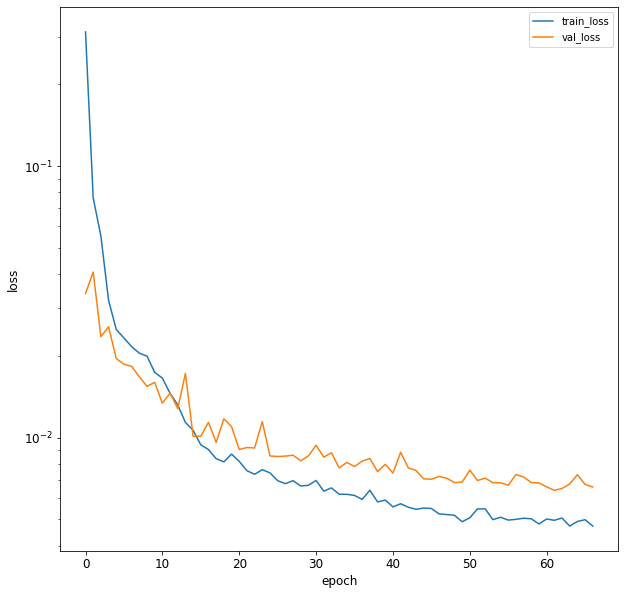

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

# **Evaluate the model** 

**Load test data set**

In [ ]:
df_test = pd.read_csv(url11)
df_test=pd.DataFrame(df_test)

In [ ]:
df_test=df_test.drop(0)
df_test=df_test.head(200)

In [ ]:
col_1=(df_test.columns)[0]
col_2=(df_test.columns)[1]
feature = 'Active Power'
df_test.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)

In [ ]:
forecast_pw ='Forecasted power'
col_3=(df_test.columns)[2]
df_test.rename(columns={col_3 :forecast_pw},inplace=True)

In [ ]:
df_test=df_test.set_index('Date & Time')
df_test = df_test.apply(pd.to_numeric)
df_test=df_test.div(1000)

In [ ]:
#df_test

In [ ]:
df_test_temp=df_test[t_skip::t_skip]
#df_test_temp

In [ ]:
df_test_new_1=df_test_temp[[feature,forecast_pw]]
#df_test_new_1

In [ ]:
date_output = pd.np.array((df_test_new_1.index.values))
#date_output

**Scale tht test data**

In [ ]:
x=np.array(df_test[feature])
#x

In [ ]:
l=(arraysum(x,t_skip))
L=[]
for i,j in zip(date_output,l):
  L.append([i,j])
#L

In [ ]:
df_test_new = pd.DataFrame(L, columns = ["Date & Time", "Active Power"])
#df_test_new

In [ ]:
df_test_new[forecast_pw]=np.array(df_test_new_1[forecast_pw])
#df_test_new

In [ ]:
df_test_new=df_test_new.set_index('Date & Time')
#df_test_new


In [ ]:
df_test_new.describe()

,Active Power,Forecasted power
count,66.00,66.00
mean,75.55,73.93
std,22.90,24.96
min,13.16,14.78
25%,59.71,57.10
50%,77.05,77.65
75%,98.04,98.62
max,101.63,102.11


**Create test set features**

In [ ]:
scaler = MinMaxScaler()
test=pd.DataFrame(df_test_new[feature])
test[feature] = scaler.fit_transform(test)
#test

In [ ]:
test_shifted = test.copy()
test_shifted['y_t+1'] = test_shifted[feature].shift(-1)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted[feature].shift(T-t)
test_shifted = test_shifted.rename(columns={feature:'Original_active_power'})

forecasted_values=np.array(df_test_new['Forecasted power'])
test_shifted['Forecasted power'] = forecasted_values
#test_shifted

In [ ]:
test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted['y_t+1'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)
#X_test

In [ ]:
print(y_test.shape)
print(X_test.shape)

(60,)
(60, 6, 1)


**Make predictions on test set**

In [ ]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
#predictions

In [ ]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['Date & Time'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='Date & Time', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df['prediction'] =predictions 

eval_df['Forecasted power']=np.array(test_shifted['Forecasted power'])
#eval_df

In [ ]:
eval_df[['prediction']]=scaler.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scaler.inverse_transform(np.array(eval_df[['actual']]))
eval_df

,Date & Time,h,prediction,actual,Forecasted power
0,9/1/2021 3:00,t+1,97.85,98.16,99.91
1,9/1/2021 3:30,t+1,97.72,98.45,99.19
2,9/1/2021 4:00,t+1,98.12,99.74,99.65
3,9/1/2021 4:30,t+1,99.69,101.52,99.90
4,9/1/2021 5:00,t+1,101.46,101.57,102.10
5,9/1/2021 5:30,t+1,100.77,101.54,102.11
6,9/1/2021 6:00,t+1,100.46,101.59,102.06
7,9/1/2021 6:30,t+1,100.60,101.63,101.98
8,9/1/2021 7:00,t+1,100.65,101.58,102.07
9,9/1/2021 7:30,t+1,100.57,81.45,102.02


In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = eval_df['actual']
pred = eval_df['prediction']

mape(actual, pred)

14.941891531960774

In [ ]:
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

actual = eval_df['actual']
pred = eval_df['prediction']

rmse(actual, pred)

11.312308217233982

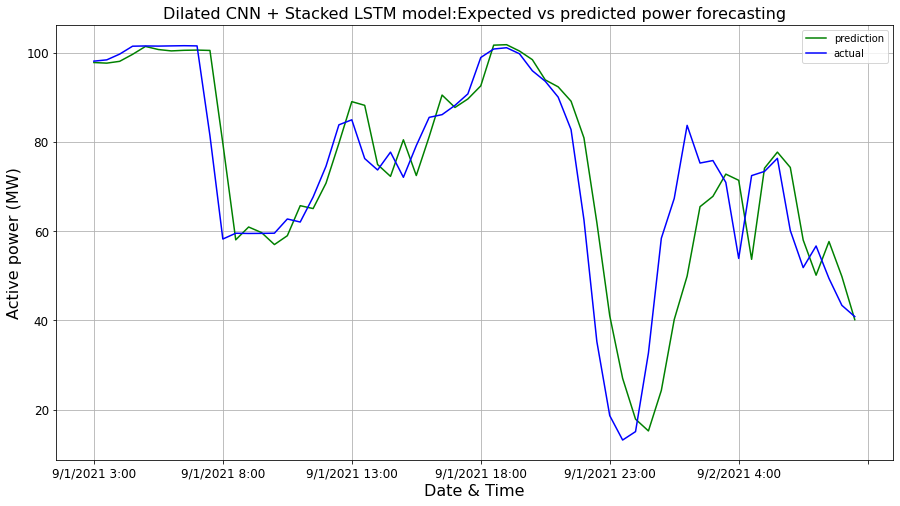

In [ ]:
eval_df.plot(x='Date & Time', y=['prediction','actual'], style=['g','b'],fontsize=12, figsize=(15, 8))
plt.title("Dilated CNN + Stacked LSTM model:Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.savefig("Dilated CNN+Stacked LSTM-results.pdf")
plt.show()

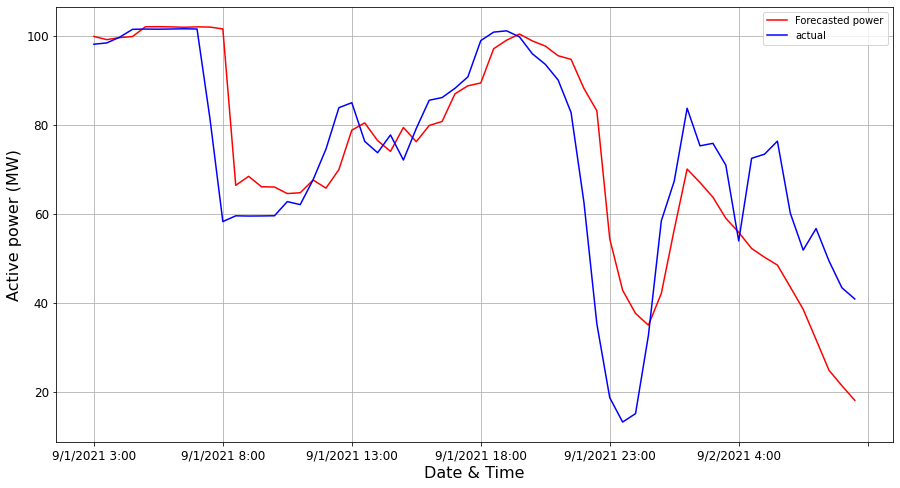

In [ ]:
eval_df.plot(x='Date & Time', y=['Forecasted power', 'actual'], style=['r', 'b'],fontsize=12, figsize=(15, 8))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.show()

In [ ]:
eval_df['prediction_diff_kw']=np.abs(eval_df['prediction']-eval_df['actual'])
eval_df['our_rs_eror']=np.sqrt(np.abs(eval_df['prediction']-eval_df['actual']))
eval_df['precentage error']=(np.abs(eval_df['prediction']-eval_df['actual']))/eval_df['actual']*100
eval_df

,Date & Time,h,prediction,actual,Forecasted power,prediction_diff_kw,our_rs_eror,precentage error
0,9/1/2021 3:00,t+1,97.85,98.16,99.91,0.31,0.56,0.31
1,9/1/2021 3:30,t+1,97.72,98.45,99.19,0.74,0.86,0.75
2,9/1/2021 4:00,t+1,98.12,99.74,99.65,1.62,1.27,1.63
3,9/1/2021 4:30,t+1,99.69,101.52,99.90,1.83,1.35,1.80
4,9/1/2021 5:00,t+1,101.46,101.57,102.10,0.11,0.33,0.11
5,9/1/2021 5:30,t+1,100.77,101.54,102.11,0.77,0.88,0.75
6,9/1/2021 6:00,t+1,100.46,101.59,102.06,1.13,1.06,1.11
7,9/1/2021 6:30,t+1,100.60,101.63,101.98,1.03,1.02,1.02
8,9/1/2021 7:00,t+1,100.65,101.58,102.07,0.94,0.97,0.92
9,9/1/2021 7:30,t+1,100.57,81.45,102.02,19.12,4.37,23.47


MAPE of our prediction

In [ ]:
def mape(actual, forecast): 
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

actual = eval_df['actual']
forecast = eval_df['Forecasted power']

mape(actual, forecast)

24.908169059024722

RMSE of our prediction

In [ ]:
def rmse(actual, forecast): 
    actual, forecast = np.array(actual), np.array(forecast)
    x=np.mean((actual - forecast)**2)
    return np.sqrt(x)

actual = eval_df['actual']
forecast = eval_df['Forecasted power']

rmse(actual, forecast)

15.433344294001468

**Clean up model files**

In [ ]:
for m in glob('model_*.h5'):
    os.remove(m)